# Best Neighborhood in Pittsburgh: FINAL REPORT

Team Zel, Neal, and Q

## Introduction

Using the datasets provided by the WPRDC, we narrowed down the factors to determine the best neighborhood in Pittsburgh to the following:

- Public Assistance Income (add links to datasets for each of these?)
- Criminal Activity
- Number of Trees

Public Assistance Income (PAI) was included as a sub-metric because we believed it was an efficient attribute to describe the flow of income in each city, whereas the more PAI a neighborhood recieves, is presumably equivalent to a lower average income. We considered the idea that neighborhoods with a higher average income will Neighborhoods with lower percentages are considered the “best” under this sub-metric because they have fewer households depending on government income assistance.

Safety plays a major role in how residents experience where they live, it affects community life, mobility, trust, and overall quality of life. This is especially important for families who want a safe environment where their children can grow up without the fear of getting robbed or, god forbid, something worse.

Trees are an important indicator of environmental quality and livability in urban neighborhoods. The tree count metric measures the total number of city-managed trees in each neighborhood as a proxy for green infrastructure and environmental health. Neighborhoods with more trees benefit from cleaner air, reduced stormwater runoff, lower temperatures in summer, and more pleasant streetscapes. More trees correlates with better environmental quality and neighborhood livability.

## The Metric

Our overall submetric is socio-economic conditions of each neighborhood. We determined our metric by looking at the following items:

### Public Assistance Income
For the percentage of public assistance, we calculated it by dividing the total households on PAI by the total households in each neighborhood and multiplying by 100. To normalize the metric, we created a 0–1 "point system", where a lower score indicates less reliance on public assistance and a higher ranking for economic stability. This helped us compare neighborhoods fairly, regardless of their size.
Some neighborhood names were unusual or did not correspond directly to recognized Pittsburgh neighborhoods, so these were treated as outliers in the analysis. Neighborhoods with very small populations were also noted, as a few households on assistance could disproportionately affect the percentage.

After applying this metric, the neighborhood with the lowest percentage of households receiving public assistance (the “winner” for this submetric) is Charter’s City, while neighborhoods with higher percentages show greater reliance on assistance. This submetric provides a useful perspective on economic stability across Pittsburgh neighborhoods, even if it is only one part of the overall comparison.

### Monthly Crime Activtity
While we initially considered using total crime incidents, I decided that total crime can be misleading because many non-violent crimes (like minor theft or property damage) do not directly impact a person's physical safety. Therefore, I chose to specifically analyze violent crimes, which more accurately reflect how safe or unsafe a place may feel.
I filtered the dataset to include only violent offense categories and then counted the total number of violent incidents in each neighborhood during the time period./n

### Tree Count

For the tree count metric, we counted the total number of city-managed trees in each neighborhood using data from the City of Pittsburgh Department of Public Works Forestry Division.

**Tree Count = Total number of trees per neighborhood**

To normalize this metric and make it comparable with the other submetrics, we used the same 0–1 scoring system:

**Normalized Score = (x - x_min) / (x_max - x_min)**

Where neighborhoods with more trees receive higher scores. This metric captures environmental quality through green infrastructure that residents interact with daily.

## So The Best Neighborhood Is.....

To find our best neighborhood, we created a Google Sheet and put all of our ranked submetrics in, with the neighborhoods listed in alphabetical order. We made a point system where we take the ranks of all of the neighborhoods of the submetrics and added them together (Example: Shadyside is ranked 74 for crime rates, 8 for PAI, and 5 for trees, so its total point amount is 87 ), then we took the total points and found the average (divided by 3). The neighborhood with the least average points is considered the “best”. The neighborhood we got using this system was Squirrel Hill North, with a average of 16 points. Our chart is below:

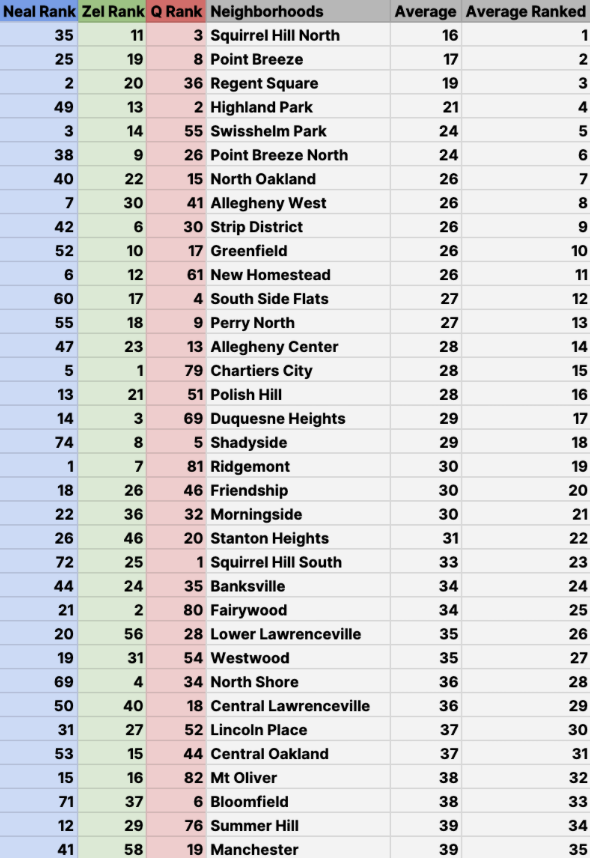

In [1]:
from IPython.display import Image
Image("chart.png")

## CONCLUSION

Aihzel's Conclusion: 
Squirrel Hill is my favorite area in Pittsburgh because of the cozy, tree-lined streets, the welcoming community, and the variety of local shops and restaurants that make it feel lively but still peaceful. I had no idea, however, that the neighborhoods in it were split between North and South, which was surprising and made me realize how much I didn’t know about the city’s layout. Looking at the data-driven determination of the “best neighborhood,” I kind of expected either Squirrel Hill or Shadyside to win, because they aren’t overly crowded, have many shops and amenities, and are visually pleasing places to live. The data made me think differently, though, because it considers factors like crime rates, income, and access to services—things I might not notice just from spending time in the area. While my personal favorite is based on comfort, aesthetics, and convenience, the data shows a more objective perspective, highlighting qualities I might overlook, but that affect overall livability.

Neal's Conclusion:
Based on my submetric of violent crime, the most peaceful neighborhood in Pittsburgh is Ridgemont. I defined “peacefulness” as having fewer incidents of violent crime, which I measured using five NIBRS offense categories: Assault Offenses, Robbery, Sex Offenses, Kidnapping/Abduction, and Homicide Offenses. I aggregated all reported offenses in these categories from January 2024 through October 2025 and counted the number of incidents per neighborhood. Ridgemont had only 3 recorded violent offenses in this time period, which is significantly lower than most neighborhoods in the city. Therefore, using the metric of low violent crime as a measure of peace, Ridgemont is the most peaceful neighborhood in Pittsburgh.

Q's Conclusion:
While the metric identifies Squirrel Hill South as the "best" in terms of city-managed tree count, my personal favorite neighborhood is North Shore. The data-driven approach shows which neighborhoods have the most green infrastructure, but it doesn't capture everything that makes a neighborhood great. My metric measures environmental quality through tree coverage, but it doesn't account for factors like accessibility, cultural diversity, or community spaces. In other words, data provides one valuable perspective, but "best" is subjective and depends on individual priorities and what people value in where they live.

## DATA

### Aihzel's Data (Public Assistance Income)

We start by importing pandas and getting matplotlib ready to go. Then we import the data using the WPRDC link as follows. We then inspect the data by printing it,and then only keeping the relevant columns. We then rename them for easier reference, and delete any rows with missing data: We calculate the percentage of households in each neighborhood that recieve PAI, and then we sort the neighborhoods by how much PAI they recieve, least to greatest. We then plot these neighborhoods using a bar chart, and print out the neighborhood that recieves the least PAI.



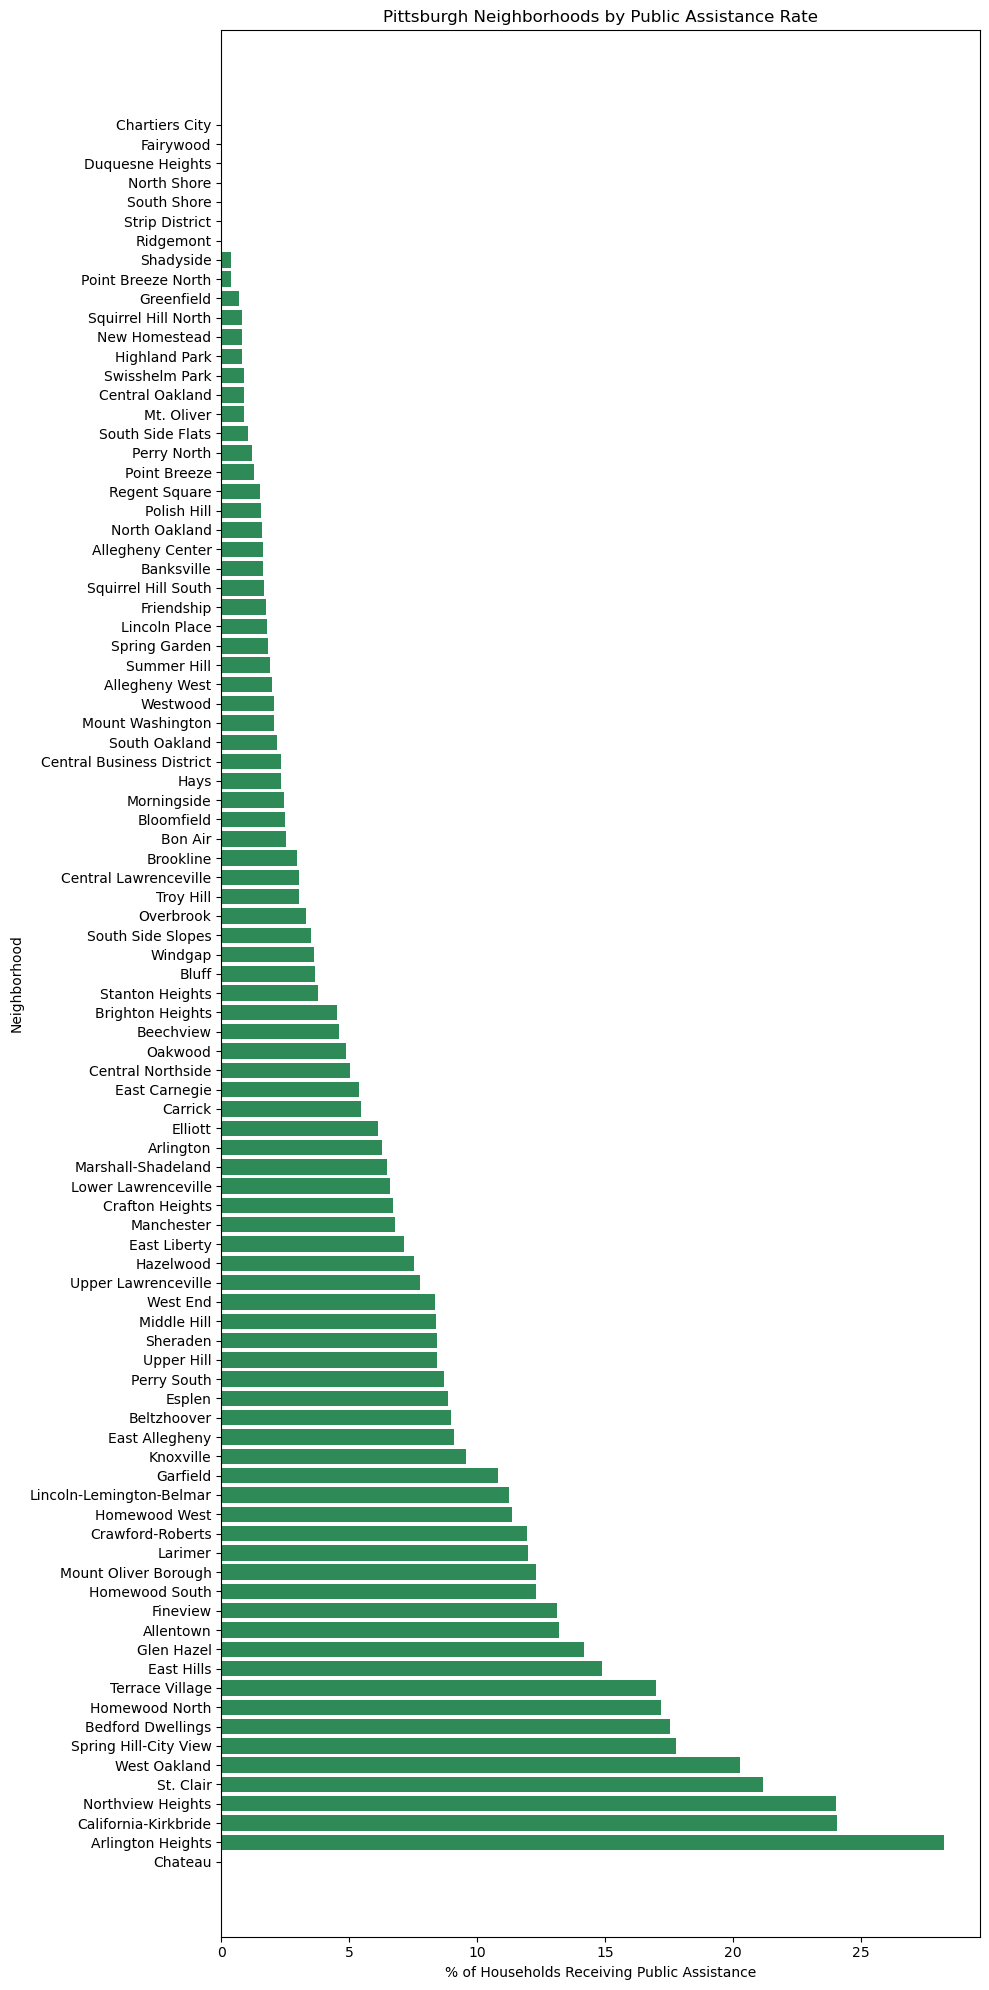

Best Neighborhood (Public Assistance metric): Chartiers City
→ 0.00% of households receive public assistance


In [4]:
# import pandas for data manipulation, matplotlib for data visualization
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# load dataset from WPRDC URL
acs_url = "https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/38a5632d-1355-492c-8735-51bf68bdff13/download/public-assistance-income-in-the-past-12-months-for-households.csv"
acs = pd.read_csv(acs_url)

# keeps only relevant columns (neighborhood name, total households, and households receiving public assistance income)
acs.columns = acs.columns.str.strip()

# renaming columns for easier reference
acs = acs[['Neighborhood', 
           'Estimate; Total:', 
           'Estimate; Total: - With public assistance income']]

acs = acs.rename(columns={
    'Neighborhood': 'neighborhood',
    'Estimate; Total:': 'total_households_est',
    'Estimate; Total: - With public assistance income': 'public_assist_est'
})

# remove rows with missing data
acs = acs.dropna(subset=['public_assist_est', 'total_households_est'])

# calculate % of households on public assistance
acs['pct_public_assist'] = (acs['public_assist_est'] / acs['total_households_est']) * 100

# sort neighborhoods by % public assistance
ranked = acs.sort_values('pct_public_assist')

# plot all neighborhoods

plt.figure(figsize=(10, 20))  # taller figure to fit all names
plt.barh(ranked['neighborhood'], ranked['pct_public_assist'], color='seagreen')
plt.gca().invert_yaxis()
plt.xlabel("% of Households Receiving Public Assistance")
plt.ylabel("Neighborhood")
plt.title("Pittsburgh Neighborhoods by Public Assistance Rate")
plt.tight_layout()
plt.show()

# print best (lowest assistance) neighborhood
best = ranked.iloc[0]
print(f"Best Neighborhood (Public Assistance metric): {best['neighborhood']}")
print(f"→ {best['pct_public_assist']:.2f}% of households receive public assistance")



Table Data:

In [6]:
ranked[['neighborhood', 'pct_public_assist']]


,neighborhood,pct_public_assist
20,Chartiers City,0.000000
31,Fairywood,0.000000
24,Duquesne Heights,0.000000
57,North Shore,0.000000
71,South Shore,0.000000
...,...,...
78,St. Clair,21.153846
58,Northview Heights,24.029126
14,California-Kirkbride,24.054983
4,Arlington Heights,28.235294


### Quentin's Data: Trees

In [3]:
# take all trees and group them
# count how many trees are in each group
# turn them into columns
trees_by_hood = trees.groupby('neighborhood').size().reset_index(name='tree_count')

# remove trees that are not in specific neighborhoods
trees_by_hood = trees_by_hood.dropna(subset=['neighborhood'])

# add up all trees in every neighborhood
# calculate the % by trees in each neighborhood 
total_trees = trees_by_hood['tree_count'].sum()
trees_by_hood['pct_of_total'] = (trees_by_hood['tree_count'] / total_trees) * 100

# take values of neighborhoods with the smallest tree count
# take values of neighborhoods with the largest tree count
# use formula to convert into 0 and 1 scale
# least trees=0, most trees=1 and evrything else false in between
vals = trees_by_hood['tree_count']
trees_by_hood['tree_score'] = (vals - vals.min()) / (vals.max() - vals.min())

# arrange data in order, use the "tree_count" column
# biggest to smallest - descending 
ranked = trees_by_hood.sort_values('tree_count', ascending=False)

print("Top 10 neighborhoods by tree count:")
pd.set_option("display.max_rows", None)
print(ranked[['neighborhood', 'tree_count', 'pct_of_total', 'tree_score']].head(10))

Top 10 neighborhoods by tree count:
                 neighborhood  tree_count  pct_of_total  tree_score
76        Squirrel Hill South        5073     11.161716    1.000000
39              Highland Park        2941      6.470847    0.579653
75        Squirrel Hill North        2083      4.583058    0.410489
71           South Side Flats        1693      3.724972    0.333596
67                  Shadyside        1558      3.427943    0.306979
9                  Bloomfield        1436      3.159516    0.282926
28               East Liberty        1366      3.005501    0.269125
62               Point Breeze        1316      2.895490    0.259267
60                Perry North        1007      2.215622    0.198344
16  Central Business District        1002      2.204620    0.197358


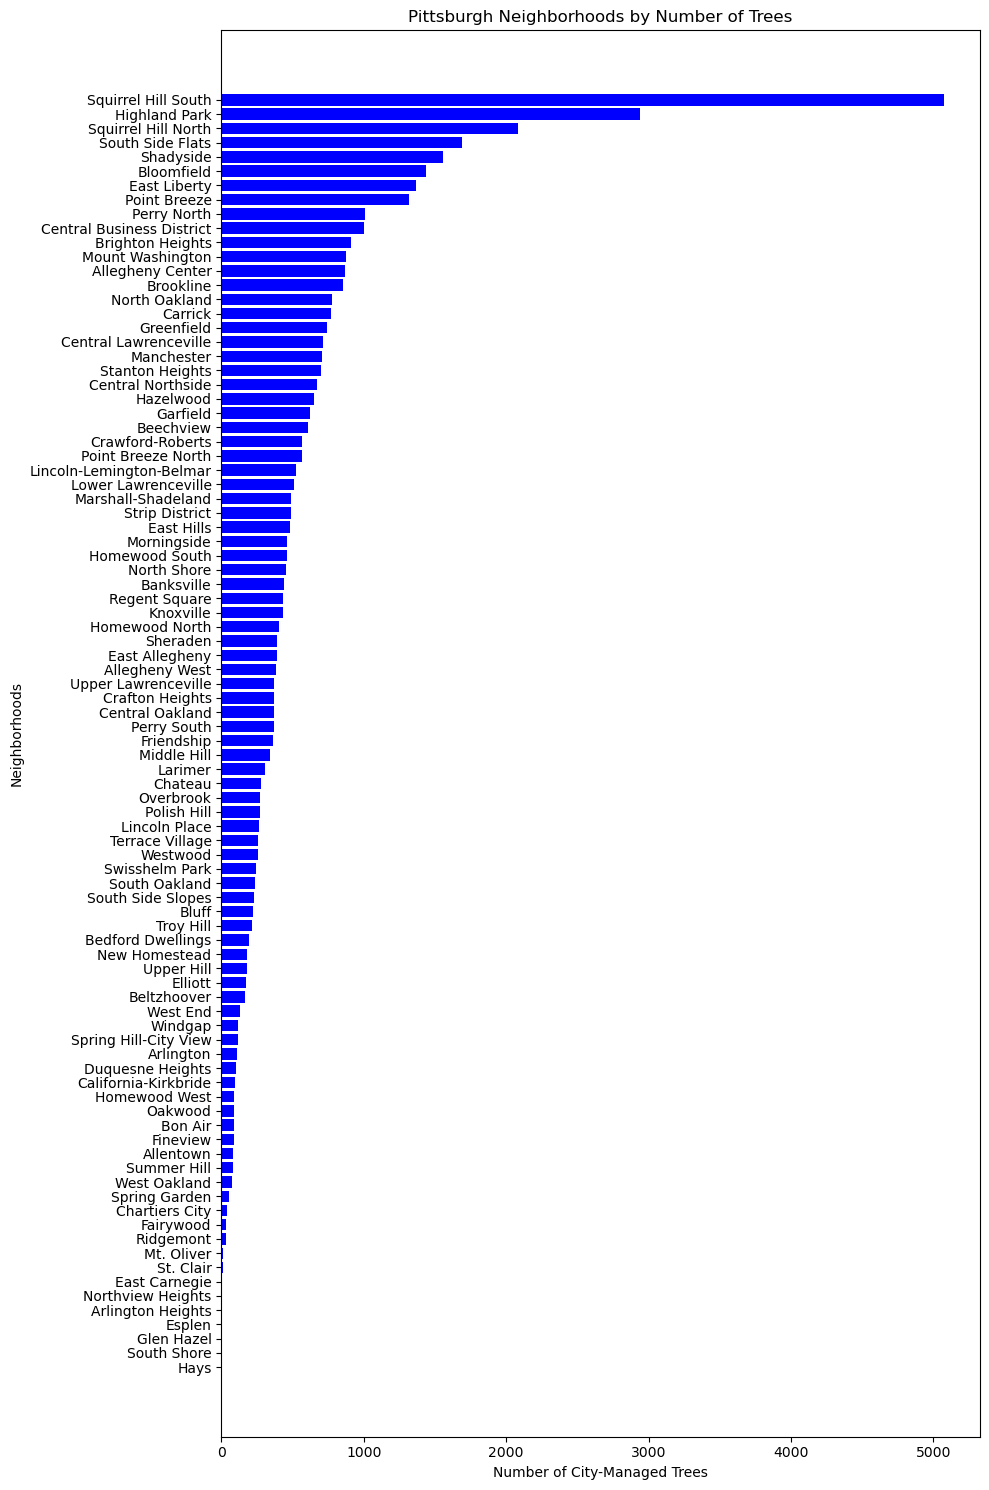

Best Neighborhood (Tree Count metric): Squirrel Hill South
- 5073 city-managed trees
- 11% of all Pittsburgh city trees


In [17]:
# makes a blank canvas
plt.figure(figsize=(10, 15))

# create horizontal bar chart with neighborhood names
plt.barh(ranked['neighborhood'], ranked['tree_count'], color='blue')

# flip the chart upside down
plt.gca().invert_yaxis()

# add labels to the chart
plt.xlabel("Number of City-Managed Trees")
plt.ylabel("Neighborhoods")
plt.title("Pittsburgh Neighborhoods by Number of Trees")

# beautifier:)
plt.tight_layout()

# actually display the chart
plt.show()

# print the best neighborhood
# get the first row
best = ranked.iloc[0]
print(f"Best Neighborhood (Tree Count metric): {best['neighborhood']}")
print(f"- {best['tree_count']:.0f} city-managed trees")
print(f"- {best['pct_of_total']:.0f}% of all Pittsburgh city trees")

### Neal's Data: Monthly Crime Activity

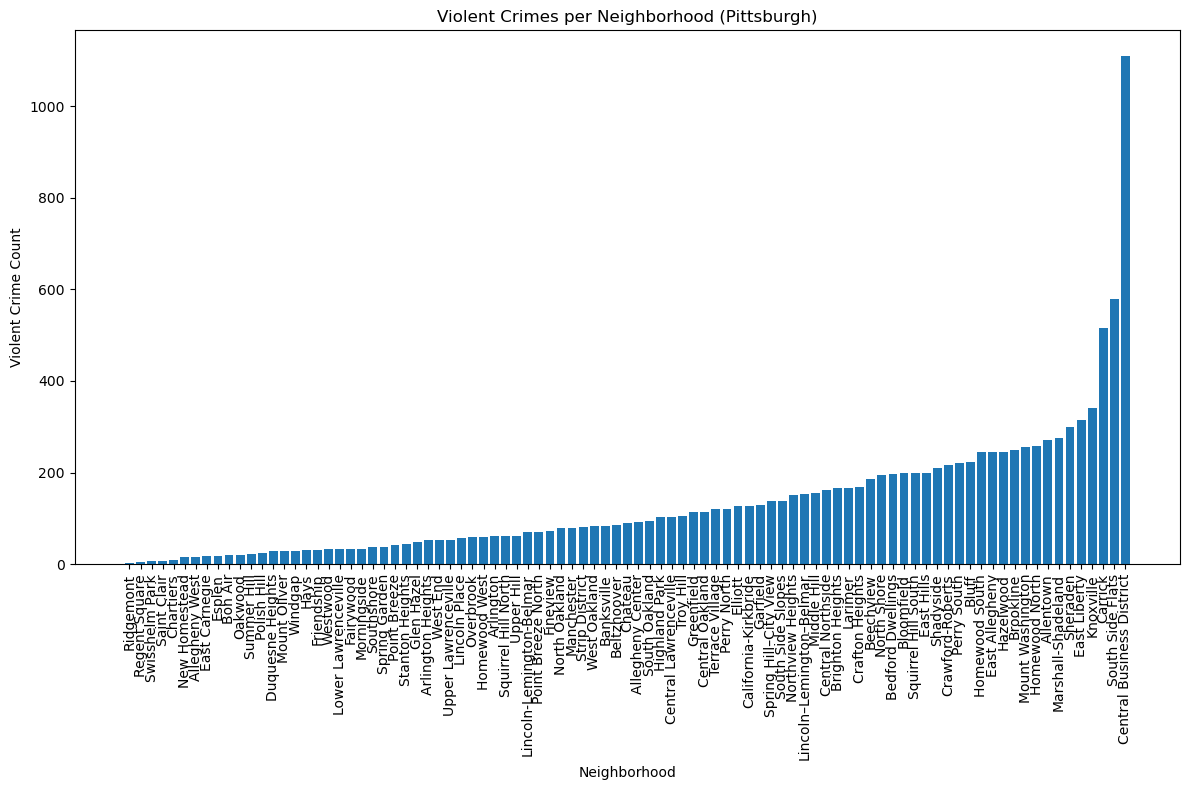

,Neighborhood,Violent_Crime_Count
67,Ridgemont,3
66,Regent Square,5
82,Swisshelm Park,7
68,Saint Clair,7
20,Chartiers,9
55,New Homestead,15
1,Allegheny West,16
26,East Carnegie,17
30,Esplen,17
11,Bon Air,21


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.wprdc.org/datastore/dump/bd41992a-987a-4cca-8798-fbe1cd946b07?format=csv"
df = pd.read_csv(url, low_memory=False)

violent_categories = [
    "Assault Offenses",
    "Robbery",
    "Sex Offenses",
    "Kidnapping/Abduction",
    "Homicide Offenses"
]

violent_crimes = df[df["NIBRS_Offense_Category"].isin(violent_categories)]

peace_score = (
    violent_crimes.groupby("Neighborhood")
    .size()
    .reset_index(name="Violent_Crime_Count")
    .sort_values("Violent_Crime_Count")
)

plt.figure(figsize=(12, 8))
plt.bar(peace_score["Neighborhood"], peace_score["Violent_Crime_Count"])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Violent Crime Count")
plt.title("Violent Crimes per Neighborhood (Pittsburgh)")
plt.tight_layout()
plt.show()

#peace_score.head(90)
pd.set_option("display.max_rows", None)
peace_score

In [7]:
df["NIBRS_Offense_Category"].value_counts().head(30)


NIBRS_Offense_Category
Larceny/Theft Offenses                      13438
Not NIBRS Reportable                        13113
Assault Offenses                            11768
All other Offenses                          11306
Drug/Narcotic Offenses                       6201
Destruction/Damage/Vandalism of Property     5879
Fraud Offenses                               3927
Motor Vehicle Theft                          2184
Burglary/Breaking & Entering                 1621
Weapon Law Violations                        1444
Robbery                                       835
Sex Offenses                                  535
Arson                                         210
Kidnapping/Abduction                          168
Homicide Offenses                              71
Human Trafficking                               9
Name: count, dtype: int64